<a href="https://colab.research.google.com/github/drewm8080/Analyzing-COVID-19-Data-Sources/blob/main/Covidestim_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**User Input Here**

In [19]:
print('Welcome to the COVID-19 Covidestim Statistics')
print('')
print('Please tell me which state you would like to see. Type full name of state with the first letter capitalized. EX: Florida, Georgia etc.')
print('NOTE: This notebook was orginally ran on 07.25.21')
userinput = input('Please put state name here:')

Welcome to the COVID-19 Covidestim Statistics

Please tell me which state you would like to see. Type full name of state with the first letter capitalized. EX: Florida, Georgia etc.
NOTE: This notebook was orginally ran on 07.25.21
Please put state name here:Florida


**Framework for Cases and Deaths from Covidestim**

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

In [21]:
# loading in the data
df= pd.read_csv('Covidestim Data.csv')

In [22]:
# setting datetime index 
df.date = pd.to_datetime(df.date)

In [23]:
# making sure the data starts after 03-01-2020
df = df[df.date >= '2020-03-01']
df = df[df.date <= '2021-02-21']

In [24]:
# slicing the data 
df = df.loc[:,['state','date','cases.fitted','deaths.fitted']]

In [25]:
# cleaning the data
df['Cases'] = df['cases.fitted']
df['Deaths'] = df['deaths.fitted']
df = df.drop(columns =['cases.fitted','deaths.fitted'])

In [26]:
# selecting the state
df = df[df.state == userinput]

In [27]:
# cleaning the data
df= df.reset_index(drop = True)

In [28]:
# calulating the cummulative cases
for i in range(1,len(df)):
  x = df.loc[i,'Cases'] + df.loc[i-1,'Cases']
  df.loc[i,'Cases'] = x

In [29]:
# calulating the cummulative deaths
for i in range(1,len(df)):
  x = df.loc[i,'Deaths'] + df.loc[i-1,'Deaths']
  df.loc[i,'Deaths'] = x

In [30]:
# creating day column for each date 
df['Day'] = df.groupby('state')['date'].rank(ascending=True)

In [31]:
df['Avg day of case'] = 0 # declaring new column
df['Avg day of death'] = 0

In [32]:
# setting the first day of each state to be the first date of cases 
df.loc[df.groupby('state')['date'].head(1).index, 'Avg day of case'] = df.loc[:,'Day']

In [33]:
# setting the first day as the first row in Avg day of death

df.loc[df.groupby('state')['date'].head(1).index, 'Avg day of death'] = df.loc[:,'Day']

In [34]:
# creating the CDF Column
df['cdf_cases'] = df['Cases']

In [35]:
# creating the cdf column
df['cdf_deaths'] = df['Deaths']

In [36]:
# creating the formula for the CDF column
df.loc[:,'cdf_cases':] = df.loc[:,'cdf_cases':].div(df.iloc[-1]['cdf_cases':])
df = df.reset_index()

In [37]:
# creating the formula for the CDF column
df['cdf_deaths'] = df.loc[:,'cdf_deaths':].div(df.iloc[-1]['cdf_deaths':])

In [38]:
# Calculating the Average Day of Case
for i in range(1, len(df)):
  x = (((df.loc[i, 'Cases'] - df.loc[i-1, 'Cases']) * (df.loc[i, 'Day']- df.loc[i-1, 'Avg day of case'])) / (df.loc[i, 'Cases'])) + (df.loc[i-1, 'Avg day of case'])
  df.loc[i, 'Avg day of case'] = round(x, 2)

In [39]:
# Calulating Average day of Death
for i in range(1, len(df)):
  x = (((df.loc[i, 'Deaths'] - df.loc[i-1, 'Deaths']) * (df.loc[i, 'Day']- df.loc[i-1, 'Avg day of death'])) / (df.loc[i, 'Deaths'])) + (df.loc[i-1, 'Avg day of death'])
  df.loc[i, 'Avg day of death'] = round(x, 2)

In [40]:
# subtracting the avg death day and avg case day
df['Avg Death Day - Avg Case Day'] = df['Avg day of death'] - df['Avg day of case'] 

In [41]:
df['Avg Case Day - Avg Death Day']= df['Avg day of case']- df['Avg day of death']

In [42]:
# avg case day/ current day
df['Avg Day of Case/ Current Day'] = df['Avg day of case'] / df['Day']

In [43]:
# avg death day/ current day
df['Avg Day of Death/ Current Day'] = df['Avg day of death'] / df['Day']

In [44]:
# cleaning data
df = df.drop(columns = 'index')

In [45]:
df= df.round(decimals = 4)

In [46]:
df

,state,date,Cases,Deaths,Day,Avg day of case,Avg day of death,cdf_cases,cdf_deaths,Avg Death Day - Avg Case Day,Avg Case Day - Avg Death Day,Avg Day of Case/ Current Day,Avg Day of Death/ Current Day
0,Florida,2020-03-01,2.941000e-01,0.0028,1.0,1.00,1.00,1.5726e-07,9.48092e-08,0.00,0.00,1.0000,1.0000
1,Florida,2020-03-02,6.924000e-01,0.0068,2.0,1.58,1.58,3.70191e-07,2.27078e-07,0.00,0.00,0.7900,0.7900
2,Florida,2020-03-03,1.233700e+00,0.0123,3.0,2.20,2.22,6.59606e-07,4.11895e-07,0.02,-0.02,0.7333,0.7400
3,Florida,2020-03-04,1.972100e+00,0.0200,4.0,2.87,2.91,1.0544e-06,6.70401e-07,0.04,-0.04,0.7175,0.7275
4,Florida,2020-03-05,2.982800e+00,0.0308,5.0,3.59,3.64,1.59477e-06,1.03216e-06,0.05,-0.05,0.7180,0.7280
...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,Florida,2021-02-17,1.846202e+06,29272.5688,354.0,237.58,224.20,0.987096,0.980556,-13.38,13.38,0.6711,0.6333
354,Florida,2021-02-18,1.852394e+06,29421.7592,355.0,237.97,224.86,0.990407,0.985553,-13.11,13.11,0.6703,0.6334
355,Florida,2021-02-19,1.858478e+06,29568.2688,356.0,238.36,225.51,0.993659,0.990461,-12.85,12.85,0.6696,0.6335
356,Florida,2021-02-20,1.864457e+06,29712.0431,357.0,238.74,226.15,0.996856,0.995277,-12.59,12.59,0.6687,0.6335


**Statistics**

In [47]:
# framework for statistics
averagedayofcase = df['Avg day of case'].iloc[-1]
averagedayofdeath = df['Avg day of death'].iloc[-1]
differDeaths = df['Avg Death Day - Avg Case Day'].max()
dateofdifferDeath = df.loc[df['Avg Death Day - Avg Case Day'].idxmax(), 'date']
dateofdifferCase = df.loc[df['Avg Case Day - Avg Death Day'].idxmax(), 'date']
differCases= df['Avg Case Day - Avg Death Day'].max()
datesDeathDayGreaterThanCase = df['date'].where(df['Avg day of death']>df['Avg day of case'])

In [48]:
pd.set_option('max_rows', 99999)

In [49]:
print('COVID-19 STATISTICS')
print('')
print('State = ', df.state.iloc[-1])
print('Average Day of Death and Average Day of Case as of',df['date'].iloc[-1])
print('Case =', averagedayofcase)
print('Death = ', averagedayofdeath)
print('Days When Average Dates of Death Differ By Largest Amounts')
print('Amount:', differDeaths,'Days',',','Day = ',dateofdifferDeath)
print('Days When Average Dates of Cases Differ By Largest Amounts')
print('Amount:',differCases,'Days',',','Day = ',dateofdifferCase)
print("The number of days per month where Average Death Day is greater than Average Case Day:")
datesDeathDayGreaterThanCase.groupby(datesDeathDayGreaterThanCase.dt.month).count()

COVID-19 STATISTICS

State =  Florida
Average Day of Death and Average Day of Case as of 2021-02-21 00:00:00
Case = 239.11
Death =  226.77
Days When Average Dates of Death Differ By Largest Amounts
Amount: 7.16 Days , Day =  2020-10-18 00:00:00
Days When Average Dates of Cases Differ By Largest Amounts
Amount: 22.96 Days , Day =  2020-07-14 00:00:00
The number of days per month where Average Death Day is greater than Average Case Day:


date
3.0     19
4.0     30
5.0     31
6.0     13
9.0     20
10.0    31
11.0    16
Name: date, dtype: int64

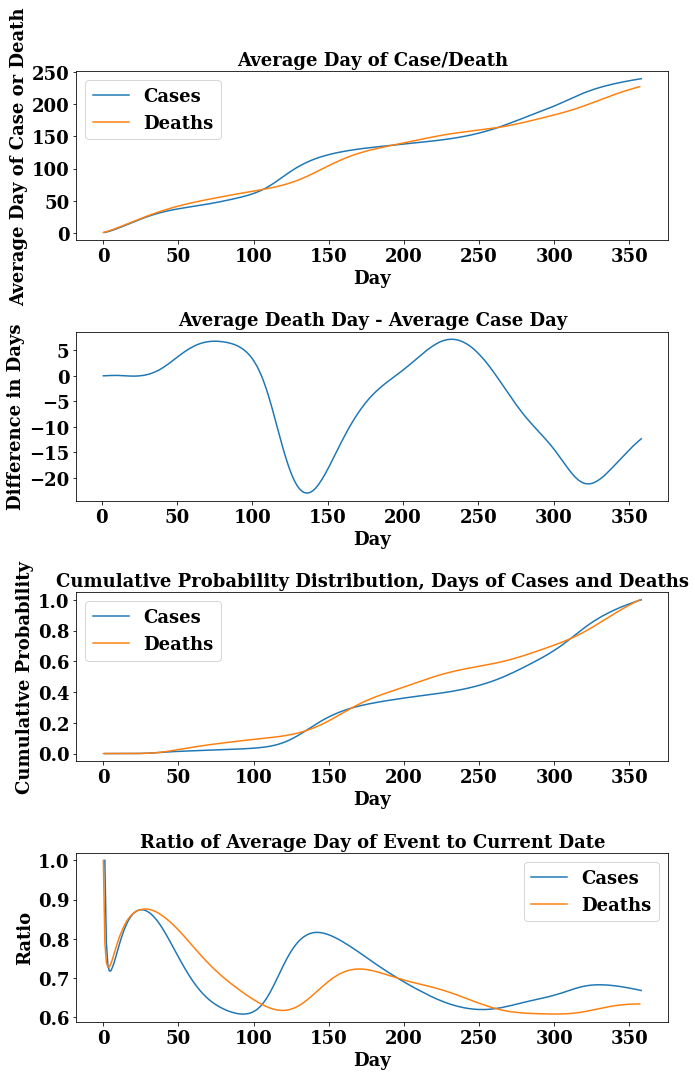

In [50]:
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
params = {'axes.labelsize': 18,'axes.titlesize':18, 'legend.fontsize': 18, 'xtick.labelsize': 18, 'ytick.labelsize': 18}
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams.update(params)
plt.figure(figsize = (10,15))

plt.subplot(4,1,1)
plt.plot(df['Day'], df['Avg day of case'],df['Avg day of death'])
plt.title('Average Day of Case/Death',weight = 'bold')
plt.xlabel('Day')
plt.ylabel('Average Day of Case or Death')
plt.legend(['Cases','Deaths'])

plt.subplot(4,1,2)
plt.plot(df['Day'], df['Avg Death Day - Avg Case Day'])
plt.title('Average Death Day - Average Case Day',weight = 'bold')
plt.xlabel('Day')
plt.ylabel('Difference in Days')

plt.subplot(4,1,3)
plt.plot(df['Day'],df['cdf_cases'],df['cdf_deaths'])
plt.title('Cumulative Probability Distribution, Days of Cases and Deaths',weight = 'bold')
plt.xlabel('Day')
plt.ylabel('Cumulative Probability')
plt.legend(['Cases','Deaths'])

plt.subplot(4,1,4)
plt.plot(df['Day'], df['Avg Day of Case/ Current Day'], df['Avg Day of Death/ Current Day'])
plt.title('Ratio of Average Day of Event to Current Date',weight = 'bold')
plt.xlabel('Day')
plt.ylabel('Ratio')
plt.legend(['Cases','Deaths'])

plt.tight_layout()
plt.style.use('seaborn')

plt.savefig("image12.png")